In [1]:
!pip install unidecode
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unidecode import unidecode

                                              0.0/235.5 kB ? eta -:--:--
     -------------------------------------- 235.5/235.5 kB 7.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# Function to scrape tables from Wikipedia
def scrape_table(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table', {'class': 'wikitable'})
    dfs = pd.read_html(str(tables))
    return dfs  # Return all tables found

# URLs of Wikipedia pages with the required data
depression_url = "https://en.wikipedia.org/wiki/Epidemiology_of_depression"
sunshine_url = "https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration"

# Scrape the tables
depression_data = scrape_table(depression_url)
sunshine_data = scrape_table(sunshine_url)

# Identify the correct table containing country data
for df in depression_data:
    if 'Category' in df.columns:
        depression_df = df
        break

for df in sunshine_data:
    if 'Country' in df.columns:
        sunshine_df = df
        break

# Clean and preprocess the data
def clean_data(df):
    # Drop rows with NaN values
    df.dropna(inplace=True)
    # Remove any non-numeric characters from columns
    df['Category'] = df['Country'].str.replace(r'\[.*\]', '')
    return df

# Clean both datasets
depression_df = clean_data(depression_df)
sunshine_df = clean_data(sunshine_df)

# Merge the tables on country
merged_data = pd.merge(depression_df, sunshine_df, on='Country')

# Display correlation using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depression_rate', y='Sunshine_hours', data=merged_data)
plt.title('Correlation between Depression Rate and Sunshine Hours')
plt.xlabel('Depression Rate (%)')
plt.ylabel('Annual Average Sunshine Hours')
plt.grid(True)
plt.show()


C:\Users\kiman\AppData\Local\Temp\ipykernel_21940\2279462392.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(tables))
C:\Users\kiman\AppData\Local\Temp\ipykernel_21940\2279462392.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(tables))


KeyError: 'Country'

In [15]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# Function to scrape tables from Wikipedia
def scrape_table(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table', {'class': 'wikitable'})
    dfs = pd.read_html(str(tables))
    return dfs  # Return all tables found

# URLs of Wikipedia pages with the required data
depression_url = "https://en.wikipedia.org/wiki/Epidemiology_of_depression"
sunshine_url = "https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration"

# Scrape the tables
depression_data = scrape_table(depression_url)
sunshine_data = scrape_table(sunshine_url)

# Identify the correct table containing category data
for df in depression_data:
    if 'Category' in df.columns:
        depression_df = df
        break

for df in sunshine_data:
    if 'Country' in df.columns:
        sunshine_df = df
        break

# Clean and preprocess the data
def clean_data(df):
    # Drop rows with NaN values
    df.dropna(inplace=True)
    # Remove any non-numeric characters from columns
    if 'Category' in df.columns:
        df['Category'] = df['Category'].str.replace(r'\[.*\]', '')
    elif 'Country' in df.columns:
        df['Country'] = df['Country'].str.replace(r'\[.*\]', '')
    return df

# Clean both datasets
depression_df = clean_data(depression_df)
sunshine_df = clean_data(sunshine_df)

# Merge the tables on country
merged_data = pd.merge(depression_df, sunshine_df, left_on='Category', right_on='Country')

# Print the merged DataFrame
print(merged_data)

# Print the column names of the merged DataFrame
print(merged_data.columns)

# Display correlation using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depression_rate', y='Sunshine_hours', data=merged_data)
plt.title('Correlation between Depression Rate and Sunshine Hours')
plt.xlabel('Depression Rate (%)')
plt.ylabel('Annual Average Sunshine Hours')
plt.grid(True)
plt.show()


C:\Users\kiman\AppData\Local\Temp\ipykernel_21940\2863100238.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(tables))
C:\Users\kiman\AppData\Local\Temp\ipykernel_21940\2863100238.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(tables))


     Category    1990    2017 Absolute change Relative change   Country  \
0     Algeria  454.02  455.36           +1.34             <1%   Algeria   
1     Algeria  454.02  455.36           +1.34             <1%   Algeria   
2      Angola  300.38  307.07           +6.68             +2%    Angola   
3       Benin  270.23  272.67           +2.43             <1%     Benin   
4       Benin  270.23  272.67           +2.43             <1%     Benin   
..        ...     ...     ...             ...             ...       ...   
99     Zambia  334.01  337.31           +3.30             <1%    Zambia   
100    Zambia  334.01  337.31           +3.30             <1%    Zambia   
101    Zambia  334.01  337.31           +3.30             <1%    Zambia   
102  Zimbabwe  286.38  286.72           +0.34             <1%  Zimbabwe   
103  Zimbabwe  286.38  286.72           +0.34             <1%  Zimbabwe   

            City    Jan    Feb    Mar  ...    May    Jun    Jul    Aug    Sep  \
0        Algiers  

ValueError: Could not interpret value `Depression_rate` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [16]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# Function to scrape tables from Wikipedia
def scrape_table(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table', {'class': 'wikitable'})
    dfs = pd.read_html(str(tables))
    return dfs  # Return all tables found

# URLs of Wikipedia pages with the required data
depression_url = "https://en.wikipedia.org/wiki/Epidemiology_of_depression"
sunshine_url = "https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration"

# Scrape the tables
depression_data = scrape_table(depression_url)
sunshine_data = scrape_table(sunshine_url)

# Identify the correct table containing category data
for df in depression_data:
    if 'Category' in df.columns:
        depression_df = df
        break

for df in sunshine_data:
    if 'Country' in df.columns:
        sunshine_df = df
        break

# Clean and preprocess the data
def clean_data(df):
    # Drop rows with NaN values
    df.dropna(inplace=True)
    # Remove any non-numeric characters from columns
    if 'Category' in df.columns:
        df['Category'] = df['Category'].str.replace(r'\[.*\]', '')
    elif 'Country' in df.columns:
        df['Country'] = df['Country'].str.replace(r'\[.*\]', '')
    return df

# Clean both datasets
depression_df = clean_data(depression_df)
sunshine_df = clean_data(sunshine_df)

# Merge the tables on country
merged_data = pd.merge(depression_df, sunshine_df, left_on='Category', right_on='Country')

# Print the merged DataFrame
print(merged_data)

# Print the column names of the merged DataFrame
print(merged_data.columns)

# Display correlation using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depression rate', y='Sunshine hours', data=merged_data)
plt.title('Correlation between Depression Rate and Sunshine Hours')
plt.xlabel('Depression Rate (%)')
plt.ylabel('Annual Average Sunshine Hours')
plt.grid(True)
plt.show()


C:\Users\kiman\AppData\Local\Temp\ipykernel_21940\570863219.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(tables))
C:\Users\kiman\AppData\Local\Temp\ipykernel_21940\570863219.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(tables))


     Category    1990    2017 Absolute change Relative change   Country  \
0     Algeria  454.02  455.36           +1.34             <1%   Algeria   
1     Algeria  454.02  455.36           +1.34             <1%   Algeria   
2      Angola  300.38  307.07           +6.68             +2%    Angola   
3       Benin  270.23  272.67           +2.43             <1%     Benin   
4       Benin  270.23  272.67           +2.43             <1%     Benin   
..        ...     ...     ...             ...             ...       ...   
99     Zambia  334.01  337.31           +3.30             <1%    Zambia   
100    Zambia  334.01  337.31           +3.30             <1%    Zambia   
101    Zambia  334.01  337.31           +3.30             <1%    Zambia   
102  Zimbabwe  286.38  286.72           +0.34             <1%  Zimbabwe   
103  Zimbabwe  286.38  286.72           +0.34             <1%  Zimbabwe   

            City    Jan    Feb    Mar  ...    May    Jun    Jul    Aug    Sep  \
0        Algiers  

ValueError: Could not interpret value `Depression rate` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

C:\Users\kiman\AppData\Local\Temp\ipykernel_21940\608148423.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(tables))
C:\Users\kiman\AppData\Local\Temp\ipykernel_21940\608148423.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(tables))


     Category    1990    2017 Absolute change Relative change   Country  \
0     Algeria  454.02  455.36           +1.34             <1%   Algeria   
1     Algeria  454.02  455.36           +1.34             <1%   Algeria   
2      Angola  300.38  307.07           +6.68             +2%    Angola   
3       Benin  270.23  272.67           +2.43             <1%     Benin   
4       Benin  270.23  272.67           +2.43             <1%     Benin   
..        ...     ...     ...             ...             ...       ...   
99     Zambia  334.01  337.31           +3.30             <1%    Zambia   
100    Zambia  334.01  337.31           +3.30             <1%    Zambia   
101    Zambia  334.01  337.31           +3.30             <1%    Zambia   
102  Zimbabwe  286.38  286.72           +0.34             <1%  Zimbabwe   
103  Zimbabwe  286.38  286.72           +0.34             <1%  Zimbabwe   

            City    Jan    Feb    Mar  ...    May    Jun    Jul    Aug    Sep  \
0        Algiers  

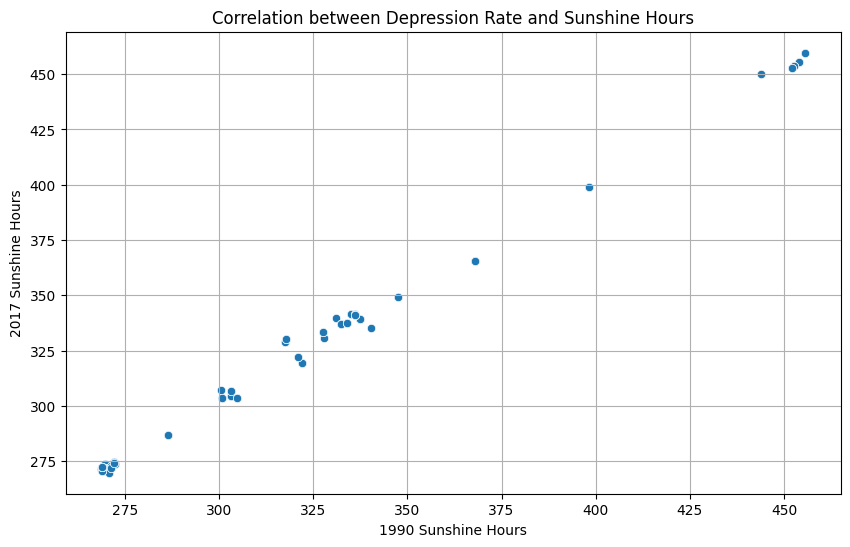

In [17]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

# Function to scrape tables from Wikipedia
def scrape_table(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table', {'class': 'wikitable'})
    dfs = pd.read_html(str(tables))
    return dfs  # Return all tables found

# URLs of Wikipedia pages with the required data
depression_url = "https://en.wikipedia.org/wiki/Epidemiology_of_depression"
sunshine_url = "https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration"

# Scrape the tables
depression_data = scrape_table(depression_url)
sunshine_data = scrape_table(sunshine_url)

# Identify the correct table containing category data
for df in depression_data:
    if 'Category' in df.columns:
        depression_df = df
        break

for df in sunshine_data:
    if 'Country' in df.columns:
        sunshine_df = df
        break

# Clean and preprocess the data
def clean_data(df):
    # Drop rows with NaN values
    df.dropna(inplace=True)
    # Remove any non-numeric characters from columns
    if 'Category' in df.columns:
        df['Category'] = df['Category'].str.replace(r'\[.*\]', '')
    elif 'Country' in df.columns:
        df['Country'] = df['Country'].str.replace(r'\[.*\]', '')
    return df

# Clean both datasets
depression_df = clean_data(depression_df)
sunshine_df = clean_data(sunshine_df)

# Merge the tables on country
merged_data = pd.merge(depression_df, sunshine_df, left_on='Category', right_on='Country')

# Print the merged DataFrame
print(merged_data)

# Print the column names of the merged DataFrame
print(merged_data.columns)

# Display correlation using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='1990', y='2017', data=merged_data)
plt.title('Correlation between Depression Rate and Sunshine Hours')
plt.xlabel('1990 Sunshine Hours')
plt.ylabel('2017 Sunshine Hours')
plt.grid(True)
plt.show()
